# Mass-Radius relation for exoplanets

Figure 5.6 from Chapter 5 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Mass-Radius relation for transiting exoplanets with measured radial velocities. 

### Data

Exoplanet Mass and Radius data are from
 * Chen & Kipping 2017, ApJ, 834, 17, Figure 3, using a slightly filtered version of their Table 1 data from VizieR J/ApJ/834/17
 * Masses and radii for TESS confirmed planets extracted from the exoplanet archive in August 2023
 * Exoplanet archive data for confirmed planets with fractional uncertainties in mass and radius <0.2 in Earth units. Data were extracted in 2023 January. Some overlap with the TESS sample, no worries.
 
Masses and radii of major solar system bodies (planets, dwarf planets, giant moons) are from the JPL Horizons
database.

### Models

Lines of model M-R relations for spheres of pure iron, rock, water, and molecular hydrogen from Li Zeng 
obtained from her website at the Harvard Smithsonian Center for Astrophysics: lweb.cfa.harvard.edu/~lzeng/planetmodels.html.

Mass and Radius uncertainty cuts applied to the data for the plots:
 * Mass: $\sigma_M/M$ = 0.2
 * Radius: $\sigma_R/R$ = 0.05
 

In [7]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [8]:
plotFile = 'Fig5_6.png'

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Exoplanet Data

We derive mass-radius data from a variety of sources

Common parameters and fractional error thresholds

In [9]:
# Mass and radius cuts

massCut = 0.2 # fractional error in mass
radCut = 0.05 # fractional error in radius

# M and R sun in earth units

mSunME = 1.98841e30 / 5.97217e24 
rSunRE = 6.957e5 / 6378.1

# M and R jupiter in earth units

mJupME = 1.89812e27 / 5.97217e24
rJupRE = 71492.1 / 6378.1

# plotting limits

mMin = 0.08 # M_earth
mMax = 1.0e4 # M_earth

rMin = 0.4 # R_earth
rMax = 40. # R_earth

### Chen & Kipping 2017

Chen & Kipping [2017, ApJ, 834, 17](https://ui.adsabs.harvard.edu/abs/2017ApJ...834...17C), Figure 3, using
a slightly filtered version of their Table 1 data from VizieR 
[J/ApJ/834/17](https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJ/834/17), in which we converted their 
.txt file into a suitable .csv file for using pandas.

The complication is they mix mass and radius units, we convert on the fly to Earth mass and radius units.

There will be some overlap with the TESS and Exoplanet archive samples, no worries.

In [10]:
# CSV version of the ASCII table 1 from VizieR

dataFile = 'MassRadius/ChenKipping2017_Table1.csv'
data = pd.read_csv(dataFile,comment='#')

# raw masses and radii along with the mass units

ckMass = np.array(data['Mass'])
ckMassErr = np.array(data['errMass'])
ckMassUnits = np.array(data['MassUnits'])
ckRad = np.array(data['Rad'])
ckRadErr = np.array(data['errRad'])
ckRadUnits = np.array(data['RadUnits'])

# convert solar to earth masses and radii as needed

iMsun = np.where(ckMassUnits=='Msun')
iMjup = np.where(ckMassUnits=='Mjup')

iRsun = np.where(ckRadUnits=='Rsun')
iRjup = np.where(ckRadUnits=='Rjup')

ckMass[iMsun] *= mSunME
ckMassErr[iMsun] *= mSunME
ckMass[iMjup] *= mJupME
ckMassErr[iMjup] *= mJupME

ckRad[iRsun] *= rSunRE
ckRadErr[iMsun] *= rSunRE
ckRad[iRjup] *= rJupRE
ckRadErr[iMjup] *= rJupRE

# exoplanets satisfying the mass and radius cuts

ckCut = np.where((ckRadErr/ckRad <= radCut) & (ckMassErr/ckMass <= massCut))[0]
print(f'Total Sample: {len(ckRad)}, {len(ckCut)} after massErr<{massCut:.2f} and radErr<{radCut:.2f} cut')  

Total Sample: 314, 207 after massErr<0.20 and radErr<0.05 cut


### TESS confirmed planets

Masses and radii for TESS confirmed planets extracted from the exoplanet archive in August 2023.

In [11]:
dataFile = 'MassRadius/TESS-M-R.csv'
data = pd.read_csv(dataFile,comment='#')

# M and R in earth units

tessMass = np.array(data['pl_masse'])
tessMassEhi = np.abs(np.array(data['pl_masseerr1']))
tessMassElo = np.abs(np.array(data['pl_masseerr2']))

effMerr = np.sqrt(tessMassEhi*tessMassElo)

tessRad = np.array(data['pl_rade'])
tessRadEhi = np.abs(np.array(data['pl_radeerr1']))
tessRadElo = np.abs(np.array(data['pl_radeerr2']))

effRerr = np.sqrt(tessRadEhi*tessRadElo)

# exoplanets satisfying the mass and radius cuts

tessCut = np.where((effRerr/tessRad <= radCut) & (effMerr/tessMass <= massCut))[0]
print(f'Total Sample: {len(tessRad)}, {len(tessCut)} after massErr<{massCut:.2f} and radErr<{radCut:.2f} cut')  

Total Sample: 249, 142 after massErr<0.20 and radErr<0.05 cut


### Exoplanet Archive confirmed planets

Masses and radii of confirmed planets with fractional uncertainties in mass and radius <0.2 in Earth units.
Data were extracted in 2023 January.  Some overlap with the TESS sample, no worries.

In [12]:
dataFile = 'MassRadius/exoplanets_2023Jan31.csv'
data = pd.read_csv(dataFile,comment='#')

# M and R in earth units

exoMass = np.array(data['pl_masse'])
exoMassEhi = np.abs(np.array(data['pl_masseerr1']))
exoMassElo = np.abs(np.array(data['pl_masseerr2']))

effMerr = np.sqrt(exoMassEhi*exoMassElo)

exoRad = np.array(data['pl_rade'])
exoRadEhi = np.abs(np.array(data['pl_radeerr1']))
exoRadElo = np.abs(np.array(data['pl_radeerr2']))

effRerr = np.sqrt(exoRadEhi*exoRadElo)

# exoplanets satisfying the mass and radius cuts

exoCut = np.where((effRerr/exoRad <= radCut) & (effMerr/exoMass <= massCut))[0]
print(f'Total Sample: {len(exoRad)}, {len(exoCut)} after massErr<{massCut:.2f} and radErr<{radCut:.2f} cut')  

Total Sample: 1404, 870 after massErr<0.20 and radErr<0.05 cut


### Major bodies of the Solar System

Data are from the JPL Horizons database

Type codes:
 * T = terrestrial planet
 * G = gas giant
 * I = ice giant
 * GM = giant moon
 * D = dwarf planet
 * DC = dwarf planet candidate


In [13]:
majorFile = 'MassRadius/SolarSystem_Major.csv'
data = pd.read_csv(majorFile,comment='#')

ssType = np.array(data['Type'])
ssMass = np.array(data['ME'])
ssRad = np.array(data['RE'])

ssmSize = {'T':4,'G':8,'I':6,'D':4,'DC':3,'GM':3} # by ssType

## Mass-Radius models

Various models of the mass-radius relation for different bulk compositions from Li Zeng from her website
at the Harvard Smithsonian Center for Astrophysics [lweb.cfa.harvard.edu/~lzeng/planetmodels.html](https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrrelation).

We plot the mass-radius relations for the following compositions:
 * Pure iron (Fe)
 * Pure rock (Enstatite: MgSiO<sub>3</sub>)
 * Pure water (300K H<sub>2</sub>O)
 * Pure hydrogen (cold H<sub>2</sub>)

In [14]:
ironFile = 'MassRadius/Zeng_MR_PureFe.txt'
data = pd.read_csv(ironFile,sep=r'\s+',header=None,comment='#')
ironM = np.array(data[0])
ironR = np.array(data[1])

rockFile = 'MassRadius/Zeng_MR_PureRock.txt'
data = pd.read_csv(rockFile,sep=r'\s+',header=None,comment='#')
rockM = np.array(data[0])
rockR = np.array(data[1])

h2oFile = 'MassRadius/Zeng_MR_PureH2O.txt'
data = pd.read_csv(h2oFile,sep=r'\s+',header=None,comment='#')
h2oM = np.array(data[0])
h2oR = np.array(data[1])

hydFile = 'MassRadius/Zeng_MR_PureH2.txt'
data = pd.read_csv(hydFile,sep=r'\s+',header=None,comment='#')
hydM = np.array(data[0])
hydR = np.array(data[1])

## Figure 5.6

Plot the mass radius relation for the three merged samples

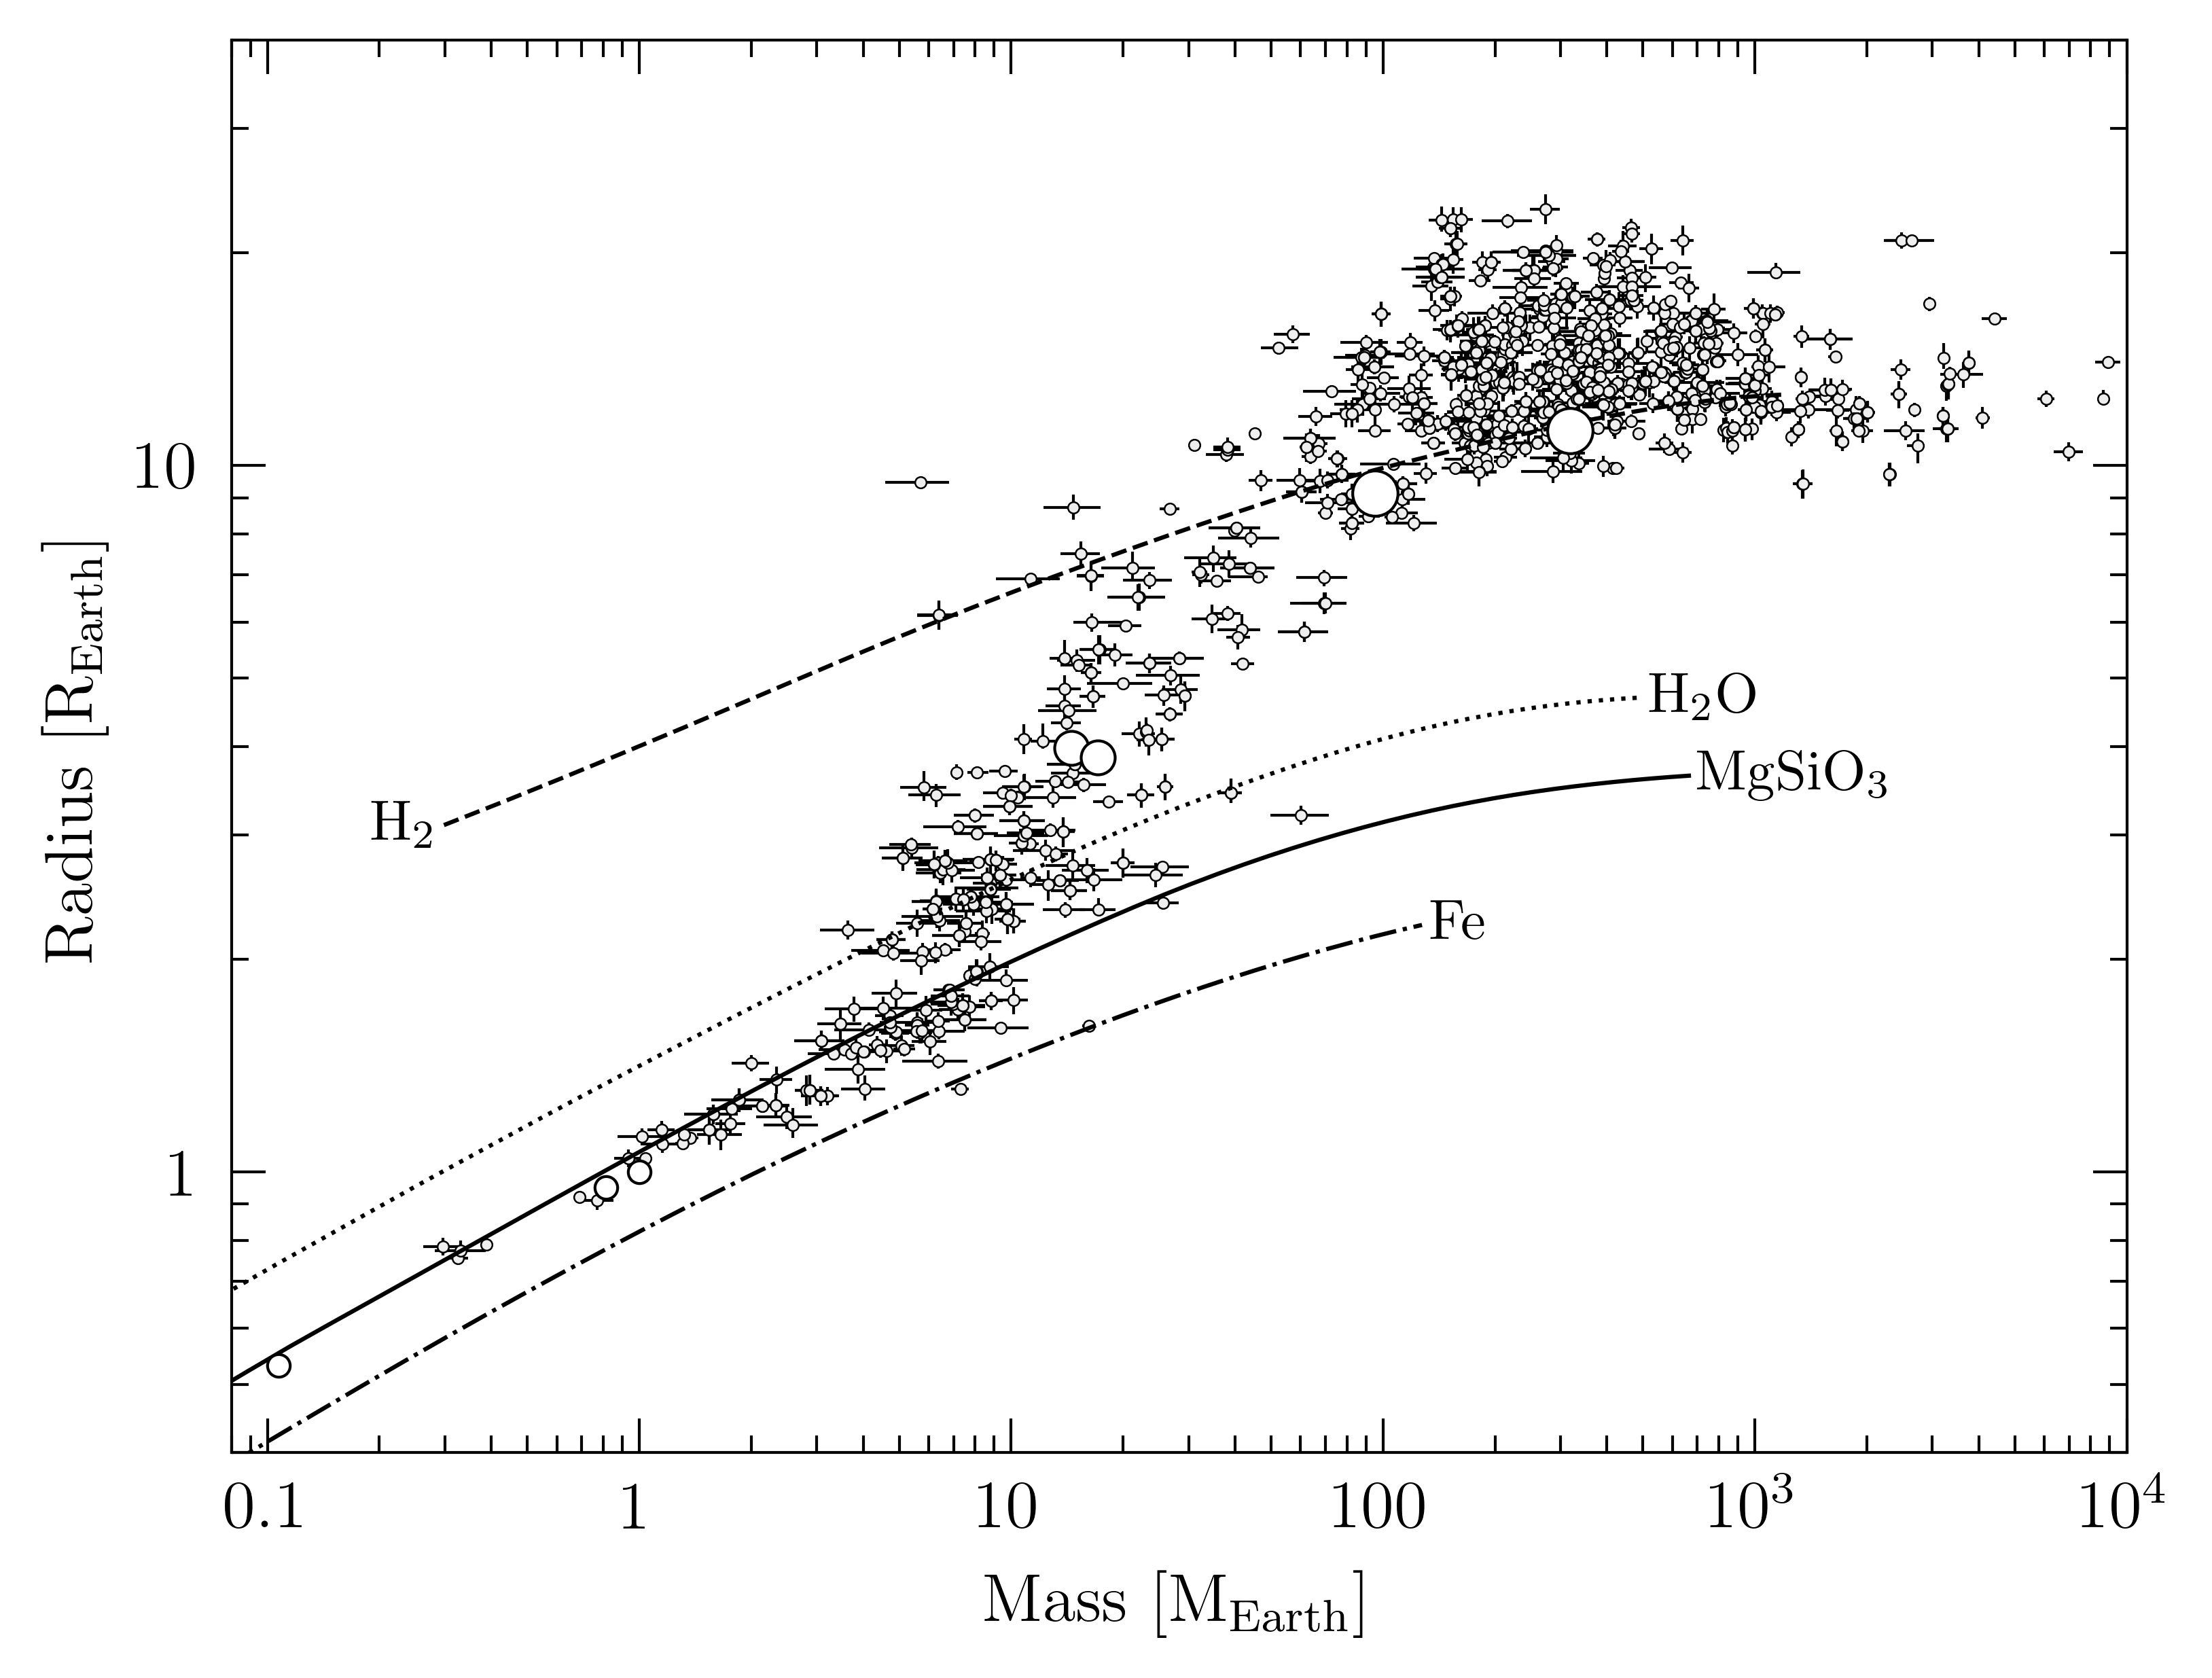

In [15]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(mMin,mMax)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([0.1,1,10,100,1e3,1e4])
ax.set_xticklabels(['0.1','1','10','100','10$^3$','10$^4$'])
ax.set_xlabel(r'Mass [M$_{\rm Earth}$]',fontsize=axisFontSize)

ax.set_ylim(rMin,rMax)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([1,10])
ax.set_yticklabels(['1','10'])
ax.set_ylabel(r'Radius [R$_{\rm Earth}$]',fontsize=axisFontSize)

ax.errorbar(exoMass[exoCut],exoRad[exoCut],xerr=[exoMassElo[exoCut],exoMassEhi[exoCut]],
            yerr=[exoRadElo[exoCut],exoRadEhi[exoCut]],fmt='o',ms=2,
            mfc='#eeeeee',mec='black',mew=0.3,capsize=0.0,elinewidth=0.5,ecolor='black',zorder=8)

ax.errorbar(tessMass[tessCut],tessRad[tessCut],xerr=[tessMassElo[tessCut],tessMassEhi[tessCut]],
            yerr=[tessRadElo[tessCut],tessRadEhi[tessCut]],fmt='o',ms=2,
            mfc='#eeeeee',mec='black',mew=0.3,capsize=0.0,elinewidth=0.5,ecolor='black',zorder=8)

ax.errorbar(ckMass[ckCut],ckRad[ckCut],xerr=ckMassErr[ckCut],yerr=ckRadErr[ckCut],fmt='o',ms=2,
            mfc='#eeeeee',mec='black',mew=0.3,capsize=0.0,elinewidth=0.5,ecolor='black',zorder=8)

# Solar system bodies

for i in range(len(ssRad)):
    ax.plot(ssMass[i],ssRad[i],'o',ms=ssmSize[ssType[i]],mfc='white',mec='black',mew=0.5,zorder=10)
    
# mass-radius model curves

ax.plot(ironM,ironR,'-.',lw=0.75,color='black',zorder=9)
ax.text(1.05*ironM[-1],ironR[-1],r'Fe',va='center',ha='left',fontsize=labelFontSize)

ax.plot(rockM,rockR,'-',lw=0.75,color='black',zorder=9)
ax.text(1.05*rockM[-1],rockR[-1],r'MgSiO$_3$',va='center',ha='left',fontsize=labelFontSize)

ax.plot(h2oM,h2oR,':',lw=0.75,color='black',zorder=9)
ax.text(1.05*h2oM[-1],h2oR[-1],r'H$_2$O',va='center',ha='left',fontsize=labelFontSize)

ax.plot(hydM,hydR,'--',lw=0.75,color='black',zorder=9)
ax.text(0.95*hydM[0],hydR[0],r'H$_2$',va='center',ha='right',fontsize=labelFontSize)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')